In [35]:
import numpy as np
import pandas as pd
from sklearn import metrics

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

Humidity value > 83 --> high

Humidity value <= 83 --> low

Temp value change

In [36]:
import csv
count = 0
with open('tennis.csv', 'r') as infile, open('input.csv', 'w') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for row in reader:
        if count == 0:
          writer.writerow(row)
          count += 1
          continue

        if int(row[2]) > 83:
          row[2] = 'high'
        else:
          row[2] = 'low'

        if int(row[1]) < 70:
          row[1] = 'cold'
        elif int(row[1]) >= 83:
          row[1] = 'hot'
        else:
          row[1] = 'mild'
        writer.writerow(row)

df=pd.read_csv("input.csv")
df

,outlook,temprature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,mild,high,True,no
2,overcast,hot,high,False,yes
3,rain,mild,high,False,yes
4,rain,cold,low,False,yes
5,rain,cold,low,True,no
6,overcast,cold,low,True,yes
7,sunny,mild,high,False,no
8,sunny,cold,low,False,yes
9,rain,mild,low,False,yes


Assign values:

In [47]:
string_to_int= preprocessing.LabelEncoder()                    
df=df.apply(string_to_int.fit_transform)
df

,outlook,temprature,humidity,windy,play
0,2,1,0,0,0
1,2,2,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [38]:
feature_cols=['outlook','temprature','humidity','windy']
X = df[feature_cols ]                             
y = df.play

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
RANDOM_STATE=100

## Gini Index

In [41]:
gini_classifier =DecisionTreeClassifier(criterion="gini", random_state=RANDOM_STATE)   
gini_classifier.fit(X_train, y_train)                                            
y_pred= gini_classifier.predict(X_test)

In [42]:
print("Accuracy gini_classifier:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

Accuracy gini_classifier: 0.3333333333333333
[[0 0]
 [2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


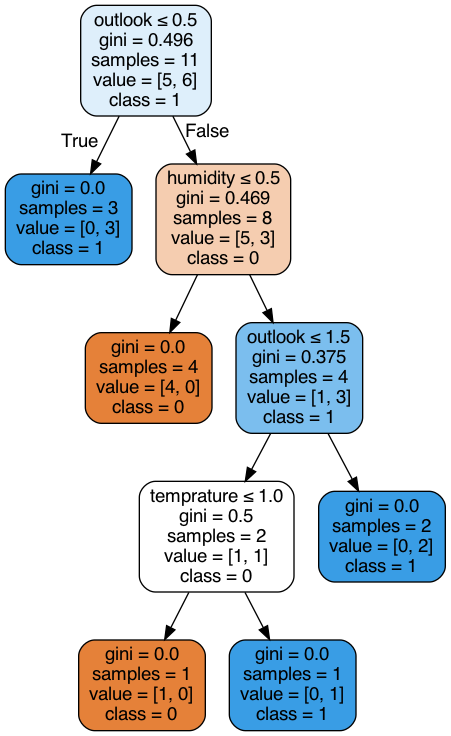

In [43]:
dot_data = StringIO()
export_graphviz(gini_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
gin_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
gin_graph.write_png('gin.png')
Image(gin_graph.create_png())

## Entropy / information gain

In [44]:
entropy_classifier =DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE)   
entropy_classifier.fit(X_train, y_train)                                            
y_pred= entropy_classifier.predict(X_test)

In [45]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy entropy_classifier:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

Accuracy entropy_classifier: 0.3333333333333333
[[0 0]
 [2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


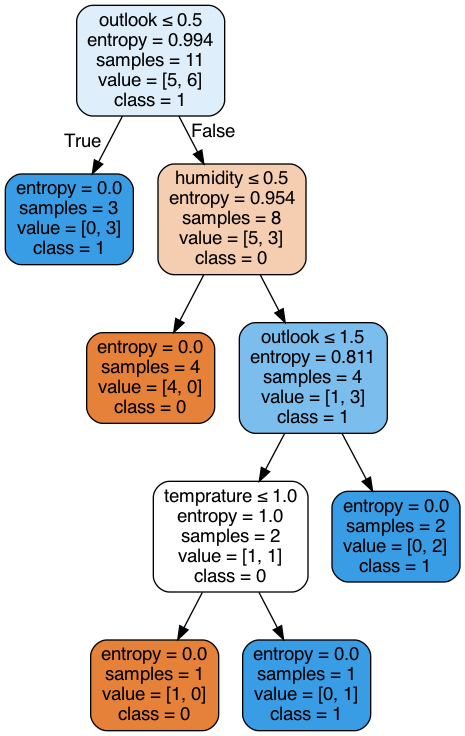

In [46]:
dot_data = StringIO()
export_graphviz(entropy_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
entropy_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
entropy_graph.write_png('entropy.png')
Image(entropy_graph.create_png())

Results:

We can see that because the sample size in both train and test case are too small, there is no significant difference between using different selection citeria (i.e, information gain or gini index)